In [1]:
# Importing the Necessary Libraries for our Task

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Reading our data from the Link
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url)

In [3]:
# Checking the Head of the data
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
# Checking the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
# Checking for null values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
# Dropping the duplicate rows from the data 
df.drop_duplicates(inplace=True)

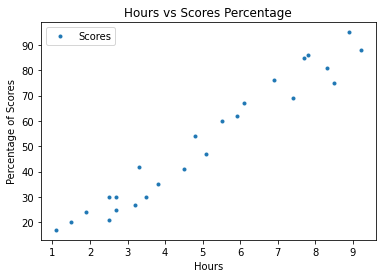

In [7]:
# Plotting our data 
df.plot(x="Hours",y="Scores",style='.')
plt.title("Hours vs Scores Percentage")
plt.xlabel("Hours")
plt.ylabel("Percentage of Scores")
plt.show()

As we can see theres a positive correlation between the number of hours and the percentage of scores and it can be 
clearly seperated by a regression line . 

In [8]:
# Feature Splitting for Training and testing the data 
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [9]:
# Importing our train_test_split model for training and testing the data 
from sklearn.model_selection import train_test_split  

In [10]:
# Since its a very small dataset we will be taking half the data for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [11]:
# Importing our Algorithms to perform the regression task

In [12]:
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [13]:
Linear_regression = LinearRegression()
xgboost = XGBRegressor()
catboost = CatBoostRegressor()
rfr = RandomForestRegressor(n_estimators=200)
dtr = DecisionTreeRegressor()

In [14]:
from sklearn.metrics import mean_squared_error as mse , mean_absolute_error as mae

We will be creating a function which can perform all the regression tasks for each and every 
Algorithm so we dont need to create a new train test split model for every single algorithm 

In [15]:
def model(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    # Comparing Actual vs Predicted
    df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
    print(df)
    # You can also test with your own data
    hours = 9.25
    own_pred = model.predict([[hours]])
    print("No of Hours = {}".format(hours))
    print("Predicted Score = {}".format(own_pred[0]))
    # Evaluating the performance of the model
    print('Mean Squared Error:',mse(y_test, y_pred)) 
    print('Mean Absolute Error:',mae(y_test, y_pred)) 

In [16]:
model(Linear_regression)

    Actual  Predicted
0       20  14.973540
1       27  31.811747
2       69  73.412023
3       30  24.878368
4       62  58.554782
5       35  37.754644
6       24  18.935471
7       86  77.373954
8       76  68.459609
9       17  11.011609
10      47  50.630920
11      85  76.383471
12      42  32.802230
No of Hours = 9.25
Predicted Score = 91.73595402298852
Mean Squared Error: 36.798186194985504
Mean Absolute Error: 5.710484526967277


In [17]:
model(xgboost)

    Actual  Predicted
0       20  21.001032
1       27  30.001406
2       69  80.998802
3       30  21.001032
4       62  67.000038
5       35  30.001406
6       24  21.001032
7       86  80.998802
8       76  67.000038
9       17  21.001032
10      47  54.001846
11      85  80.998802
12      42  30.001406
No of Hours = 9.25
Predicted Score = 88.00041961669922
Mean Squared Error: 48.07419753242748
Mean Absolute Error: 6.077049108651968


In [18]:
model(catboost)

Learning rate set to 0.020356
0:	learn: 24.6607905	total: 134ms	remaining: 2m 13s
1:	learn: 24.4463653	total: 134ms	remaining: 1m 6s
2:	learn: 24.2009456	total: 134ms	remaining: 44.6s
3:	learn: 24.0016796	total: 135ms	remaining: 33.5s
4:	learn: 23.8068473	total: 135ms	remaining: 26.8s
5:	learn: 23.5824967	total: 135ms	remaining: 22.4s
6:	learn: 23.3686162	total: 135ms	remaining: 19.2s
7:	learn: 23.1148274	total: 135ms	remaining: 16.8s
8:	learn: 22.8822469	total: 136ms	remaining: 14.9s
9:	learn: 22.6933042	total: 136ms	remaining: 13.4s
10:	learn: 22.4994553	total: 136ms	remaining: 12.2s
11:	learn: 22.2995639	total: 136ms	remaining: 11.2s
12:	learn: 22.0635902	total: 136ms	remaining: 10.4s
13:	learn: 21.8493891	total: 137ms	remaining: 9.62s
14:	learn: 21.6486162	total: 137ms	remaining: 8.98s
15:	learn: 21.4026057	total: 137ms	remaining: 8.43s
16:	learn: 21.1987149	total: 137ms	remaining: 7.93s
17:	learn: 21.0109315	total: 137ms	remaining: 7.5s
18:	learn: 20.7871340	total: 138ms	remaining

565:	learn: 1.3187221	total: 261ms	remaining: 200ms
566:	learn: 1.3159525	total: 261ms	remaining: 199ms
567:	learn: 1.3137630	total: 261ms	remaining: 199ms
568:	learn: 1.3110458	total: 261ms	remaining: 198ms
569:	learn: 1.3088976	total: 262ms	remaining: 197ms
570:	learn: 1.3068826	total: 262ms	remaining: 197ms
571:	learn: 1.3042347	total: 262ms	remaining: 196ms
572:	learn: 1.3021387	total: 262ms	remaining: 196ms
573:	learn: 1.3001706	total: 263ms	remaining: 195ms
574:	learn: 1.2981066	total: 263ms	remaining: 194ms
575:	learn: 1.2961672	total: 263ms	remaining: 194ms
576:	learn: 1.2936229	total: 263ms	remaining: 193ms
577:	learn: 1.2916093	total: 263ms	remaining: 192ms
578:	learn: 1.2897151	total: 264ms	remaining: 192ms
579:	learn: 1.2872360	total: 264ms	remaining: 191ms
580:	learn: 1.2852716	total: 264ms	remaining: 190ms
581:	learn: 1.2834216	total: 264ms	remaining: 190ms
582:	learn: 1.2810062	total: 265ms	remaining: 189ms
583:	learn: 1.2790897	total: 265ms	remaining: 189ms
584:	learn: 

In [19]:
model(dtr)

    Actual  Predicted
0       20       21.0
1       27       30.0
2       69       81.0
3       30       21.0
4       62       67.0
5       35       30.0
6       24       21.0
7       86       81.0
8       76       67.0
9       17       21.0
10      47       54.0
11      85       81.0
12      42       30.0
No of Hours = 9.25
Predicted Score = 88.0
Mean Squared Error: 48.07692307692308
Mean Absolute Error: 6.076923076923077


In [20]:
model(rfr)

    Actual  Predicted
0       20   23.41375
1       27   29.29500
2       69   79.03000
3       30   23.41375
4       62   63.31000
5       35   34.76625
6       24   23.41375
7       86   80.67500
8       76   66.78000
9       17   23.41375
10      47   54.88500
11      85   80.67500
12      42   29.29500
No of Hours = 9.25
Predicted Score = 88.445
Mean Squared Error: 43.06237079326923
Mean Absolute Error: 5.409903846153847
